In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('21_23가해이륜차종.csv', encoding='utf-8')
df.head(10)

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2021010100100002,2021년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,이륜,남,40세,중상,승합,남,49세,경상
1,2021010100100059,2021년 1월 1일 11시,금요일,서울특별시 마포구 공덕동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,이륜,남,40세,중상,승합,남,55세,상해없음
2,2021010100100083,2021년 1월 1일 13시,금요일,서울특별시 용산구 한강로2가,중상사고,0,1,4,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,이륜,남,27세,상해없음,승합,남,51세,상해없음
3,2021010100100141,2021년 1월 1일 17시,금요일,서울특별시 관악구 신림동,부상신고사고,0,0,0,1,차대차 - 정면충돌,...,맑음,교차로 - 교차로안,이륜,남,26세,부상신고,승용,남,50세,상해없음
4,2021010100100158,2021년 1월 1일 18시,금요일,서울특별시 강동구 성내동,경상사고,0,0,1,0,차대차 - 정면충돌,...,맑음,교차로 - 교차로안,이륜,남,30세,상해없음,승용,여,59세,경상
5,2021010100100186,2021년 1월 1일 19시,금요일,서울특별시 강동구 성내동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,이륜,남,30세,상해없음,보행자,여,16세,경상
6,2021010100100187,2021년 1월 1일 19시,금요일,서울특별시 양천구 신정동,중상사고,0,2,0,0,차대차 - 정면충돌,...,맑음,교차로 - 교차로안,이륜,남,41세,중상,승용,남,53세,중상
7,2021010100100247,2021년 1월 1일 22시,금요일,서울특별시 관악구 봉천동,경상사고,0,0,2,0,차대차 - 측면충돌,...,기타,기타 - 기타,이륜,남,36세,경상,이륜,남,21세,경상
8,2021010200100172,2021년 1월 2일 14시,토요일,서울특별시 중랑구 면목동,경상사고,0,0,2,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,이륜,남,37세,상해없음,승용,남,58세,상해없음
9,2021010200100174,2021년 1월 2일 14시,토요일,서울특별시 강서구 마곡동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,교차로 - 교차로안,이륜,남,34세,기타불명,승용,남,58세,경상


# 데이터 전처리

In [36]:
#결측치 확인 : 465 건의 데이터
df.isnull().sum()

사고번호            0
사고일시            0
요일              0
시군구             0
사고내용            0
사망자수            0
중상자수            0
경상자수            0
부상신고자수          0
사고유형            0
법규위반            0
노면상태            0
기상상태            0
도로형태            0
가해운전자 차종        0
가해운전자 성별        0
가해운전자 연령        0
가해운전자 상해정도      0
피해운전자 차종      465
피해운전자 성별      465
피해운전자 연령      465
피해운전자 상해정도    465
dtype: int64

In [37]:
#null 값이 있는 행들 지우기 (465개 data)
df1 = df.dropna()
df1.isnull().sum()

사고번호          0
사고일시          0
요일            0
시군구           0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
dtype: int64

In [38]:
df1.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

## 연령대 전처리

In [39]:
print(df1["가해운전자 연령"].unique())
print(df1["가해운전자 연령"].value_counts())

['40세' '27세' '26세' '30세' '41세' '36세' '37세' '34세' '23세' '38세' '31세' '21세'
 '28세' '29세' '미분류' '66세' '56세' '49세' '20세' '19세' '54세' '39세' '24세' '59세'
 '42세' '47세' '22세' '33세' '35세' '70세' '25세' '43세' '71세' '32세' '18세' '48세'
 '65세' '16세' '64세' '69세' '45세' '62세' '17세' '55세' '52세' '50세' '60세' '51세'
 '46세' '61세' '77세' '74세' '85세' '78세' '73세' '67세' '58세' '44세' '57세' '15세'
 '53세' '63세' '80세' '83세' '68세' '76세' '72세' '75세' '14세' '79세' '81세' '86세'
 '13세' '82세' '84세' '88세']
28세    325
26세    304
27세    296
30세    279
31세    277
      ... 
81세      6
85세      3
86세      3
13세      3
88세      3
Name: 가해운전자 연령, Length: 76, dtype: int64


In [40]:
import re

# 숫자 부분만 추출하는 함수 정의
def remove_non_numeric(age):
    if isinstance(age, str):
        # 정규 표현식을 사용하여 숫자만 추출
        numeric_part = re.findall(r'\d+', age)
        if numeric_part:
            return int(numeric_part[0])
    return age

# '피해운전자 연령' 컬럼에 함수 적용
df1['피해운전자 연령'] =df1['피해운전자 연령'].apply(remove_non_numeric)
df1['가해운전자 연령'] = df1['가해운전자 연령'].apply(remove_non_numeric)


# 결과 확인
print(df1['피해운전자 연령'].unique())
print(df1['가해운전자 연령'].unique())

[49 55 51 50 59 16 53 21 58 25 72 27 61 30 46 56 64 11 47 45 81 '미분류' 28
 34 29 74 48 42 40 52 31 24 39 23 41 35 26 98 73 78 67 44 37 63 75 57 54
 38 33 8 60 32 76 36 65 69 71 66 70 77 10 62 19 82 79 20 43 17 22 80 18 14
 13 68 15 83 5 9 93 6 87 92 88 7 12 4 86 84 91 85 3 89 2]
[40 27 26 30 41 36 37 34 23 38 31 21 28 29 '미분류' 66 56 49 20 19 54 39 24
 59 42 47 22 33 35 70 25 43 71 32 18 48 65 16 64 69 45 62 17 55 52 50 60
 51 46 61 77 74 85 78 73 67 58 44 57 15 53 63 80 83 68 76 72 75 14 79 81
 86 13 82 84 88]


C:\Users\User\AppData\Local\Temp\ipykernel_23164\1781872013.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['피해운전자 연령'] =df1['피해운전자 연령'].apply(remove_non_numeric)
C:\Users\User\AppData\Local\Temp\ipykernel_23164\1781872013.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['가해운전자 연령'] = df1['가해운전자 연령'].apply(remove_non_numeric)


In [41]:
# '미분류'가 아닌 가해운전자 연령 데이터의 평균을 계산
mean_age = df1[df1["가해운전자 연령"] != '미분류']["가해운전자 연령"].astype(float).mean()
mean_age1 = df1[df1["피해운전자 연령"] != '미분류']["피해운전자 연령"].astype(float).mean()

# '미분류' 값을 평균 연령으로 대체
df1["가해운전자 연령"] = df1["가해운전자 연령"].replace('미분류', mean_age)
df1["피해운전자 연령"] = df1["피해운전자 연령"].replace('미분류', mean_age1)

C:\Users\User\AppData\Local\Temp\ipykernel_23164\3124690576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["가해운전자 연령"] = df1["가해운전자 연령"].replace('미분류', mean_age)
C:\Users\User\AppData\Local\Temp\ipykernel_23164\3124690576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["피해운전자 연령"] = df1["피해운전자 연령"].replace('미분류', mean_age1)


In [42]:
import pandas as pd

# 라벨링 함수
def label_age(age):
    if 1 <= age <10:
        return '10대 미만'
    elif 10 <= age <20:
        return '10대'
    elif 20 <= age <30:
        return '20대'
    elif 30 <= age <40:
        return '30대'
    elif 40 <= age <50:
        return '40대'
    elif 50 <= age <60:
        return '50대'
    elif 60 <= age <70:
        return '60대'
    elif 70 <= age <80:
        return '70대'
    else:
        return '80세 이상'

# '가해운전자 연령' 컬럼에 라벨링 적용
df1['가해운전자 연령대'] = df1['가해운전자 연령'].apply(label_age)
age_groups = ['10대 미만', '10대', '20대', '30대', '40대','50대','60대','70대','80세 이상']
offend_age_group_counts = df1['가해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)

# '피해운전자 연령' 컬럼에 라벨링 적용
df1['피해운전자 연령대'] =df1['피해운전자 연령'].apply(label_age)
victim_age_group_counts = df1['피해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)


print(offend_age_group_counts)
print(victim_age_group_counts)

10대 미만       0
10대        739
20대       2471
30대       2277
40대       1802
50대       1582
60대        770
70대        251
80세 이상      52
Name: 가해운전자 연령대, dtype: int64
10대 미만      95
10대        312
20대       1496
30대       1920
40대       1904
50대       1898
60대       1649
70대        547
80세 이상     123
Name: 피해운전자 연령대, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_23164\3538370695.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['가해운전자 연령대'] = df1['가해운전자 연령'].apply(label_age)
C:\Users\User\AppData\Local\Temp\ipykernel_23164\3538370695.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['피해운전자 연령대'] =df1['피해운전자 연령'].apply(label_age)


## 사고일시 전처리

In [43]:
df1["사고일시"].head()

0    2021년 1월 1일 00시
1    2021년 1월 1일 11시
2    2021년 1월 1일 13시
3    2021년 1월 1일 17시
4    2021년 1월 1일 18시
Name: 사고일시, dtype: object

In [44]:
# 시간 정보를 추출하는 함수
def extract_hour(time_str):
    match = re.search(r'\d{1,2}시$', time_str)
    if match:
        return match.group()
    else:
        return None

df1['시간'] = df1['사고일시'].apply(extract_hour)
sorted(df1['시간'].unique())

C:\Users\User\AppData\Local\Temp\ipykernel_23164\2868264973.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['시간'] = df1['사고일시'].apply(extract_hour)


['00시',
 '01시',
 '02시',
 '03시',
 '04시',
 '05시',
 '06시',
 '07시',
 '08시',
 '09시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시',
 '23시']

In [45]:
# 시간대를 라벨링하는 함수
def label_time_period(time_str):
    if any(hour in time_str for hour in ['01시', '02시', '03시']):
        return '01:00 - 03:00'
    elif any(hour in time_str for hour in ['04시', '05시', '06시']):
        return '04:00 - 06:00'
    elif any(hour in time_str for hour in ['07시', '08시', '09시']):
        return '07:00 - 09:00'
    elif any(hour in time_str for hour in ['10시', '11시', '12시']):
        return '10:00 - 12:00'
    elif any(hour in time_str for hour in ['13시', '14시', '15시']):
        return '13:00 - 15:00'
    elif any(hour in time_str for hour in ['16시', '17시', '18시']):
        return '16:00 - 18:00'
    elif any(hour in time_str for hour in ['19시', '20시', '21시']):
        return '19:00 - 21:00'
    elif any(hour in time_str for hour in ['22시', '23시', '00시']):
        return '22:00 - 24:00'
    else:
        return '0'
    

# 데이터프레임에 라벨링 적용
df1['사고시간대'] = df1['시간'].apply(label_time_period)
df1['사고시간대'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_23164\2910832625.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['사고시간대'] = df1['시간'].apply(label_time_period)


19:00 - 21:00    2220
16:00 - 18:00    2043
13:00 - 15:00    1657
10:00 - 12:00    1511
22:00 - 24:00    1132
07:00 - 09:00     662
01:00 - 03:00     417
04:00 - 06:00     302
Name: 사고시간대, dtype: int64

# 데이터 인코딩

In [46]:
print(df1['사고시간대'].unique()) #원핫 인코딩
print(df1['요일'].unique()) #원핫 인코딩
print(df1['사고내용'].unique()) #레이블 인코딩
print(df1['법규위반'].unique()) #원핫 인코딩
print(df1['노면상태'].unique()) #원핫 인코딩
print(df1['기상상태'].unique()) #원핫 인코딩
print(df1['도로형태'].unique()) #원핫 인코딩
print(df1['가해운전자 연령대'].unique()) #원핫 인코딩
print(df1['사고유형'].unique()) #원핫 인코딩
print(df1['피해운전자 상해정도'].unique()) #레이블 인코딩

['22:00 - 24:00' '10:00 - 12:00' '13:00 - 15:00' '16:00 - 18:00'
 '19:00 - 21:00' '07:00 - 09:00' '04:00 - 06:00' '01:00 - 03:00']
['금요일' '토요일' '일요일' '월요일' '화요일' '수요일' '목요일']
['중상사고' '부상신고사고' '경상사고' '사망사고']
['신호위반' '보행자보호의무위반' '차로위반' '안전거리미확보' '안전운전불이행' '교차로운행방법위반' '중앙선침범'
 '직진우회전진행방해' '기타' '불법유턴']
['건조' '기타' '젖음/습기' '서리/결빙' '적설' '침수' '해빙']
['맑음' '기타' '흐림' '눈' '비' '안개']
['단일로 - 기타' '교차로 - 교차로안' '교차로 - 교차로부근' '교차로 - 교차로횡단보도내' '기타 - 기타'
 '주차장 - 주차장' '단일로 - 터널' '단일로 - 교량' '단일로 - 지하차도(도로)내' '단일로 - 고가도로위'
 '미분류 - 미분류']
['40대' '20대' '30대' '60대' '50대' '10대' '70대' '80세 이상']
['차대차 - 기타' '차대차 - 측면충돌' '차대차 - 정면충돌' '차대사람 - 횡단중' '차대사람 - 기타' '차대차 - 추돌'
 '차대사람 - 보도통행중' '차대사람 - 길가장자리구역통행중' '차대사람 - 차도통행중' '차대차 - 후진중충돌']
['경상' '상해없음' '중상' '기타불명' '부상신고' '사망']


In [47]:
input_variables=['사고시간대','요일','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 연령대', '사고유형']
output_variable='피해운전자 상해정도'

XM=df1[input_variables]
y=df1['피해운전자 상해정도']
XM.shape, y.shape

((9944, 9), (9944,))

In [48]:
XM.columns

Index(['사고시간대', '요일', '사고내용', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 연령대',
       '사고유형'],
      dtype='object')

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

# 사고내용 레이블 인코딩을 위한 매핑 딕셔너리
accident_content_mapping = {
    '부상신고사고': 0,
    '경상사고': 1,
    '중상사고': 2,
    '사망사고': 3
}

# 피해운전자 상해정도 레이블 인코딩을 위한 매핑 딕셔너리
victim_injury_mapping = {
    '상해없음': 0,
    '부상신고': 1,
    '기타불명': 2,
    '경상': 3,
    '중상': 4,
    '사망': 5
}

# 인코딩할 컬럼들
input_variables=['사고시간대','요일','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 연령대', '사고유형']
output_variable='피해운전자 상해정도'

# 원-핫 인코더 초기화
one_hot_encoder = OneHotEncoder(sparse=False)

# 레이블 인코딩 적용
df1['사고내용_LabelEncoded'] = df1['사고내용'].map(accident_content_mapping)
df1['피해운전자 상해정도_LabelEncoded'] = df1['피해운전자 상해정도'].map(victim_injury_mapping)

# 원-핫 인코딩 적용 (사고내용과 피해운전자 상해정도 제외)
input_variables.remove('사고내용')
XM = pd.get_dummies(df1[input_variables])

# 사고내용과 피해운전자 상해정도 추가
XM['사고내용_LabelEncoded'] = df1['사고내용_LabelEncoded']
y = df1['피해운전자 상해정도_LabelEncoded']

# 인코딩된 결과 확인
print(XM.head())
print(y)

# 데이터셋의 형태 확인
XM.shape, y.shape

   사고시간대_01:00 - 03:00  사고시간대_04:00 - 06:00  사고시간대_07:00 - 09:00  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   사고시간대_10:00 - 12:00  사고시간대_13:00 - 15:00  사고시간대_16:00 - 18:00  \
0                    0                    0                    0   
1                    1                    0                    0   
2                    0                    1                    0   
3                    0                    0                    1   
4                    0                    0                    1   

   사고시간대_19:00 - 21:00  사고시간대_22:00 - 24:00  요일_금요일  요일_목요일  ...  \
0                    0                    1       1       0  ...   
1                    0                    0   

C:\Users\User\AppData\Local\Temp\ipykernel_23164\1235021761.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['사고내용_LabelEncoded'] = df1['사고내용'].map(accident_content_mapping)
C:\Users\User\AppData\Local\Temp\ipykernel_23164\1235021761.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['피해운전자 상해정도_LabelEncoded'] = df1['피해운전자 상해정도'].map(victim_injury_mapping)


((9944, 68), (9944,))

In [50]:
XM.head()

,사고시간대_01:00 - 03:00,사고시간대_04:00 - 06:00,사고시간대_07:00 - 09:00,사고시간대_10:00 - 12:00,사고시간대_13:00 - 15:00,사고시간대_16:00 - 18:00,사고시간대_19:00 - 21:00,사고시간대_22:00 - 24:00,요일_금요일,요일_목요일,...,사고유형_차대사람 - 길가장자리구역통행중,사고유형_차대사람 - 보도통행중,사고유형_차대사람 - 차도통행중,사고유형_차대사람 - 횡단중,사고유형_차대차 - 기타,사고유형_차대차 - 정면충돌,사고유형_차대차 - 추돌,사고유형_차대차 - 측면충돌,사고유형_차대차 - 후진중충돌,사고내용_LabelEncoded
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,2
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,2
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


# 상관관계

**상관관계 값의 해석**
* 1: 두 변수 간의 완벽한 양의 상관관계. 한 변수가 증가할 때 다른 변수도 증가.
* 0: 두 변수 간의 상관관계가 없음. 두 변수 간에 직선적인 관계가 없음.
* -1: 두 변수 간의 완벽한 음의 상관관계. 한 변수가 증가할 때 다른 변수는 감소.

**상관관계의 강도**
* 0.7 ~ 1.0 (또는 -0.7 ~ -1.0): 강한 상관관계
* 0.3 ~ 0.7 (또는 -0.3 ~ -0.7): 중간 정도의 상관관계
* 0.0 ~ 0.3 (또는 -0.3 ~ 0.0): 약한 상관관계

In [51]:
# 상관관계 행렬 계산
correlation_matrix = XM.corr()
correlation_matrix

,사고시간대_01:00 - 03:00,사고시간대_04:00 - 06:00,사고시간대_07:00 - 09:00,사고시간대_10:00 - 12:00,사고시간대_13:00 - 15:00,사고시간대_16:00 - 18:00,사고시간대_19:00 - 21:00,사고시간대_22:00 - 24:00,요일_금요일,요일_목요일,...,사고유형_차대사람 - 길가장자리구역통행중,사고유형_차대사람 - 보도통행중,사고유형_차대사람 - 차도통행중,사고유형_차대사람 - 횡단중,사고유형_차대차 - 기타,사고유형_차대차 - 정면충돌,사고유형_차대차 - 추돌,사고유형_차대차 - 측면충돌,사고유형_차대차 - 후진중충돌,사고내용_LabelEncoded
사고시간대_01:00 - 03:00,1.000000,-0.037026,-0.055873,-0.088559,-0.093552,-0.106386,-0.112162,-0.074985,-0.025040,0.011960,...,0.004692,-0.011863,-0.012463,0.008054,-0.033152,0.023680,0.020907,0.007501,-0.007272,0.042780
사고시간대_04:00 - 06:00,-0.037026,1.000000,-0.047264,-0.074914,-0.079138,-0.089994,-0.094880,-0.063432,-0.022651,-0.010982,...,0.002605,0.004139,-0.008972,0.011077,-0.019457,0.024254,0.009189,-0.003634,-0.006152,0.052820
사고시간대_07:00 - 09:00,-0.055873,-0.047264,1.000000,-0.113044,-0.119418,-0.135800,-0.143174,-0.095718,-0.001634,0.021804,...,-0.019917,0.002364,-0.010025,-0.003450,-0.002903,-0.043880,0.020865,0.016269,0.002337,-0.006225
사고시간대_10:00 - 12:00,-0.088559,-0.074914,-0.113044,1.000000,-0.189280,-0.215246,-0.226932,-0.151715,-0.008443,-0.007838,...,-0.008904,-0.004184,-0.007619,-0.025794,0.018378,-0.007700,-0.006923,0.019696,-0.006644,-0.015647
사고시간대_13:00 - 15:00,-0.093552,-0.079138,-0.119418,-0.189280,1.000000,-0.227382,-0.239728,-0.160269,-0.001889,-0.010309,...,-0.022432,-0.003851,-0.011119,-0.033003,0.013240,-0.015670,-0.015867,0.024534,0.031095,-0.039825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
사고유형_차대차 - 정면충돌,0.023680,0.024254,-0.043880,-0.007700,-0.015670,-0.002330,0.004430,0.030635,0.017767,-0.002665,...,-0.015622,-0.029857,-0.030240,-0.063918,-0.138968,1.000000,-0.079247,-0.147295,-0.007281,0.029423
사고유형_차대차 - 추돌,0.020907,0.009189,0.020865,-0.006923,-0.015867,-0.005104,-0.018933,0.023222,0.004210,0.018101,...,-0.028213,-0.053922,-0.054613,-0.115436,-0.250977,-0.079247,1.000000,-0.266015,-0.013150,-0.039177
사고유형_차대차 - 측면충돌,0.007501,-0.003634,0.016269,0.019696,0.024534,-0.004196,-0.027968,-0.024579,-0.001843,-0.011795,...,-0.052440,-0.100225,-0.101509,-0.214560,-0.466488,-0.147295,-0.266015,1.000000,-0.024442,-0.019608
사고유형_차대차 - 후진중충돌,-0.007272,-0.006152,0.002337,-0.006644,0.031095,0.003833,-0.011679,-0.012458,-0.000025,-0.005742,...,-0.002592,-0.004954,-0.005018,-0.010606,-0.023060,-0.007281,-0.013150,-0.024442,1.000000,-0.013684


**히트맵의 해석**
* 진한 빨간색: 강한 양의 상관관계
* 진한 파란색: 강한 음의 상관관계
* 하얀색 또는 회색: 상관관계가 거의 없음

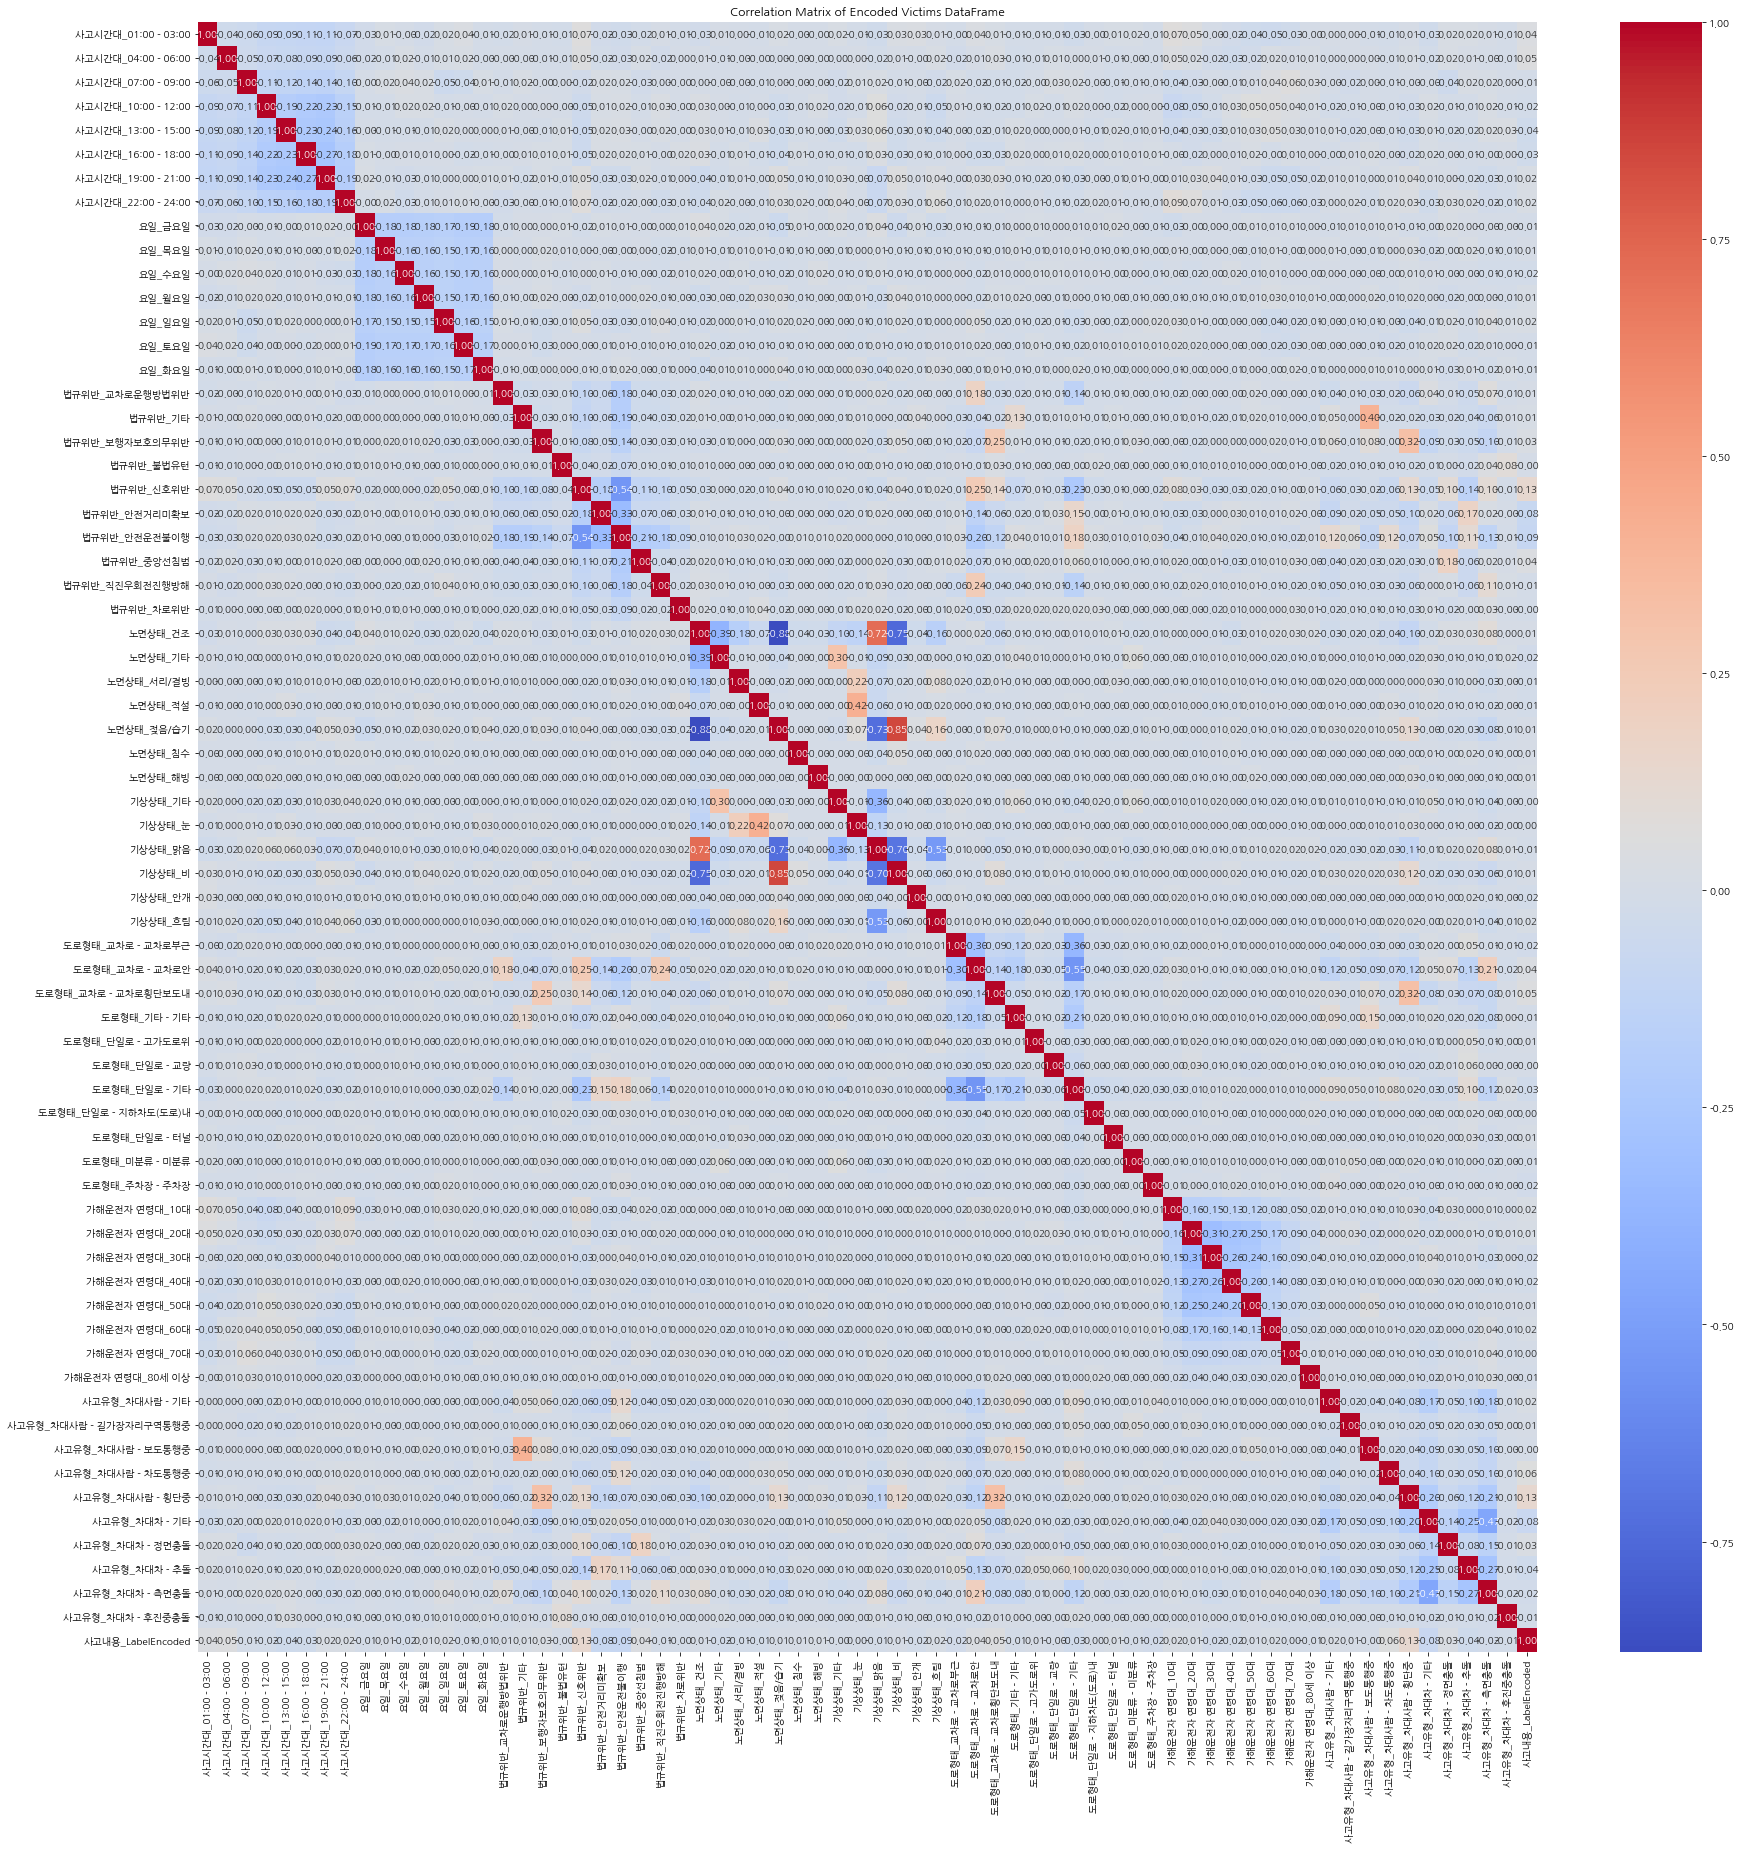

In [53]:
# 상관관계 히트맵 시각화
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus = False)
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Victims DataFrame')
plt.show()

array([[<AxesSubplot:title={'center':'사고시간대_01:00 - 03:00'}>,
        <AxesSubplot:title={'center':'사고시간대_04:00 - 06:00'}>,
        <AxesSubplot:title={'center':'사고시간대_07:00 - 09:00'}>,
        <AxesSubplot:title={'center':'사고시간대_10:00 - 12:00'}>,
        <AxesSubplot:title={'center':'사고시간대_13:00 - 15:00'}>,
        <AxesSubplot:title={'center':'사고시간대_16:00 - 18:00'}>,
        <AxesSubplot:title={'center':'사고시간대_19:00 - 21:00'}>,
        <AxesSubplot:title={'center':'사고시간대_22:00 - 24:00'}>],
       [<AxesSubplot:title={'center':'요일_금요일'}>,
        <AxesSubplot:title={'center':'요일_목요일'}>,
        <AxesSubplot:title={'center':'요일_수요일'}>,
        <AxesSubplot:title={'center':'요일_월요일'}>,
        <AxesSubplot:title={'center':'요일_일요일'}>,
        <AxesSubplot:title={'center':'요일_토요일'}>,
        <AxesSubplot:title={'center':'요일_화요일'}>,
        <AxesSubplot:title={'center':'법규위반_교차로운행방법위반'}>],
       [<AxesSubplot:title={'center':'법규위반_기타'}>,
        <AxesSubplot:title={'center':'법규위반_보행자보호의무위반

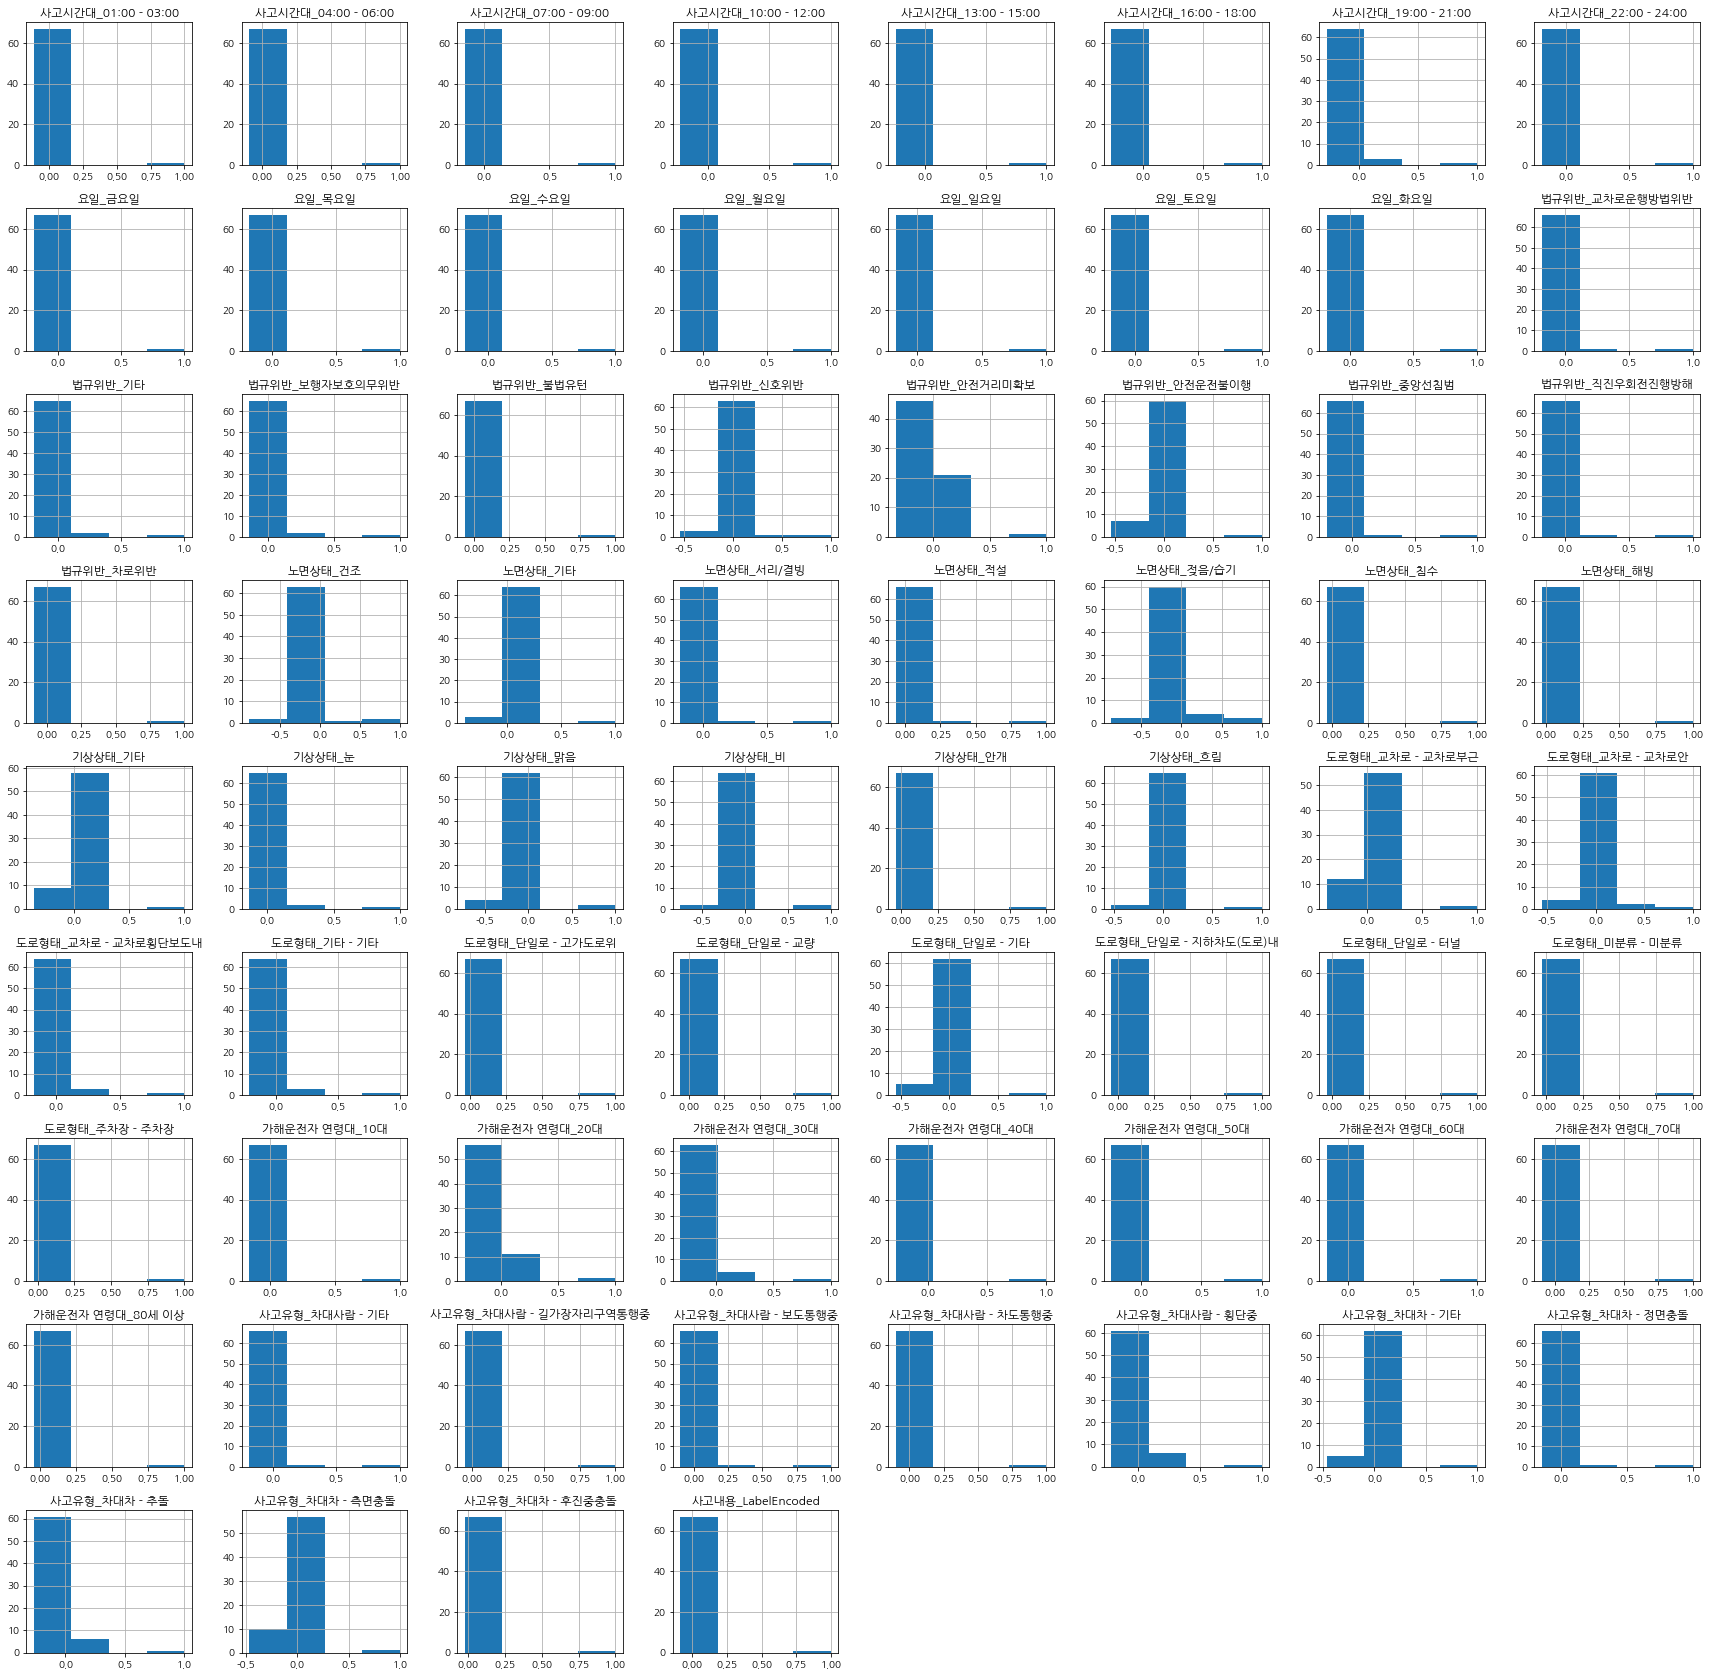

In [55]:
correlation_matrix.hist(figsize=(30, 30), bins=4)

# ML application

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(XM)
X = scaler.transform(XM)

In [57]:
from sklearn.model_selection import train_test_split

#train, test 8:2로 나누기
X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_trn.shape, y_trn.shape)

#trn set을 8:2로 trn, val 나누기
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=0.2, random_state = 42)
print(X_trn.shape, y_trn.shape)

(7955, 68) (7955,)
(6364, 68) (6364,)


In [58]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score


### 결정트리
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=19, min_impurity_decrease=0.0001)
clf.fit(X_trn, y_trn)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정트리 정확도:', accuracy)

### XgBoost
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_trn, y_trn)

y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('XgBoost 정확도:', accuracy)

결정트리 정확도: 0.6365007541478129
XgBoost 정확도: 0.6621417797888386


In [59]:
regr_lr = LinearRegression()

regr_l1_c1 = Lasso(alpha=1)
regr_l1_c10 = Lasso(alpha=10)
regr_l1_c100 = Lasso(alpha=100)
regr_l1_c100000 = Lasso(alpha=100000)

regr_dt3 = DecisionTreeRegressor(max_depth=3)
regr_dt5 = DecisionTreeRegressor(max_depth=5)
regr_dt10 = DecisionTreeRegressor(max_depth=10)


regr_rf10= RandomForestRegressor(n_estimators=10)
regr_rf50 = RandomForestRegressor(n_estimators=50)
regr_rf100 = RandomForestRegressor(n_estimators=100)


for regr in [regr_lr, regr_l1_c1, regr_l1_c10, regr_l1_c100, regr_l1_c100000, regr_dt3, regr_dt5, regr_dt10, regr_rf10, regr_rf50, regr_rf100]:
    regr.fit(X_trn, y_trn)
    y_trn_pred = regr.predict(X_trn)
    y_val_pred = regr.predict(X_val)
    trn_error = mean_squared_error(y_trn, y_trn_pred, squared=False)
    val_error = mean_squared_error(y_val, y_val_pred, squared=False)
    print('Model: {:<40} | Training RMSE: {:.3f} | Validation RMSE: {:.3f}'.format(str(regr), trn_error, val_error))   

Model: LinearRegression()                       | Training RMSE: 1.332 | Validation RMSE: 1.346
Model: Lasso(alpha=1)                           | Training RMSE: 1.565 | Validation RMSE: 1.568
Model: Lasso(alpha=10)                          | Training RMSE: 1.565 | Validation RMSE: 1.568
Model: Lasso(alpha=100)                         | Training RMSE: 1.565 | Validation RMSE: 1.568
Model: Lasso(alpha=100000)                      | Training RMSE: 1.565 | Validation RMSE: 1.568
Model: DecisionTreeRegressor(max_depth=3)       | Training RMSE: 1.350 | Validation RMSE: 1.352
Model: DecisionTreeRegressor(max_depth=5)       | Training RMSE: 1.319 | Validation RMSE: 1.314
Model: DecisionTreeRegressor(max_depth=10)      | Training RMSE: 1.259 | Validation RMSE: 1.326
Model: RandomForestRegressor(n_estimators=10)   | Training RMSE: 0.702 | Validation RMSE: 1.432
Model: RandomForestRegressor(n_estimators=50)   | Training RMSE: 0.647 | Validation RMSE: 1.383
Model: RandomForestRegressor()          

In [60]:
#lasso test 
y_l1_c100000_pred = regr_l1_c100000.predict(X_test)
y_l1_c100000_pred

array([2.08406662, 2.08406662, 2.08406662, ..., 2.08406662, 2.08406662,
       2.08406662])

In [61]:
rmse = mean_squared_error(y_test, y_l1_c100000_pred, squared=False)
print('rmse=', rmse)

rmse= 1.5747325066982494
